###Import of Libraries

In [ ]:
import pandas as pd
import io
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [ ]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


### Initial Study of the Dataset

In [ ]:
crabs_data = pd.read_csv("crabs.csv")
# Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal Lobe','RW':'Rear Width','CL':'Carapace Midline',
                                        'CW':'Maximum Width','BD':'Body Depth'})

crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})


In [ ]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


The goal is to separate the 200 crabs into four classes, given by the 2x2 configurations for sex (male/female) and species (blue/orange).

In [ ]:
crabs_data['class'] = crabs_data.species + crabs_data.sex
data_columns = ['Frontal Lobe','Rear Width','Carapace Midline','Maximum Width','Body Depth']


## Multidimensional Scaling


In [ ]:
crabs_min_max = crabs_data.copy()
crabs_min_max[data_columns] = MinMaxScaler().fit_transform(crabs_data[data_columns])

In [ ]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale


## 2D

The SMACOF (Scaling by MAjorizing a COmplicated Function) algorithm is a multidimensional scaling algorithm which minimizes an objective function (the stress) using a majorization technique. Stress majorization, also known as the Guttman Transform, guarantees a monotone convergence of stress, and is more powerful than traditional techniques such as gradient descent.

In [ ]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale


MSE: 4.150609573729308


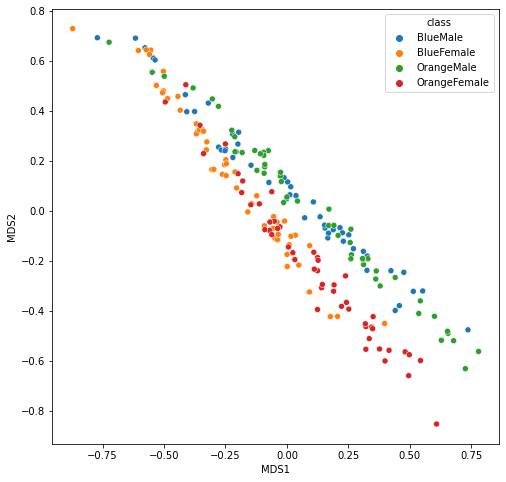

In [ ]:
# n_init is the Number of times the SMACOF algorithm will be run with different initializations
mds = MDS(n_components=2,n_init=15,metric=True)

crabs_mds = mds.fit_transform(crabs_min_max[data_columns])
crabs_min_max[['MDS1','MDS2']] = crabs_mds

print('MSE:', mds.stress_)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='MDS1',y='MDS2',hue='class',data=crabs_min_max)


## 3D

MSE: 2.6372628061026737


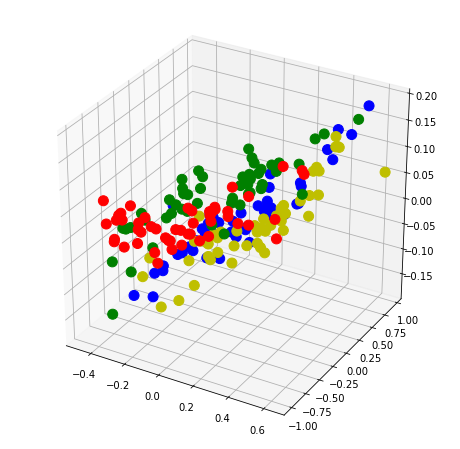

In [ ]:
mds = MDS(n_components=3,n_init=15,metric=True)
crabs_mds = mds.fit_transform(crabs_min_max[data_columns])
# Add 3 new columns
crabs_min_max[['MDS1','MDS2','MDS3']] = crabs_mds

print('MSE:', mds.stress_)

colors_crabs = {'BlueFemale': 'y','BlueMale':'b','OrangeFemale':'r','OrangeMale':'g'}

fig = plt.figure(figsize=(8,8))
# Add new axis
ax = fig.add_subplot(111,projection='3d')  # Z Axis

plt.scatter(crabs_min_max.MDS1,crabs_min_max.MDS2,zs=crabs_min_max.MDS3,depthshade=False,
            c = crabs_min_max['class'].apply(lambda x: colors_crabs[x]),s=100)


In [ ]:
fig = px.scatter_3d(crabs_min_max,x='MDS1',y='MDS2',z='MDS3',color='class')
fig.show()

In [ ]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,MDS1,MDS2,MDS3
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,0.618596,0.819350,-0.138078
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,0.588125,0.704428,-0.115007
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,0.565166,0.648923,-0.130611
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,0.514424,0.621189,-0.133081
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,0.507795,0.617117,-0.111464
